# 프로젝트 : 뉴스 카테고리 다중분류

## 1. 데이터 준비하기

## 2. 머신러닝을 이용한 분류

## 3. 딥러닝을 이용한 분류

- - -
### 데이터 준비하기

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

데이터를 불러와줍니다.

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
print("첫 번째 데이터의 문장 :", x_train[0])
print("첫 번째 데이터의 레이블 :", y_train[0])

첫 번째 데이터의 문장 : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫 번째 데이터의 레이블 : 3


데이터의 형태가 이미 토큰화 후 정수 인코딩을 마친 상태입니다.

In [ ]:
print('클래스의 수 : {}'.format(len(set(y_train))))

클래스의 수 : 46


분류해야할 클래스는 46개입니다.

훈련용 뉴스의 최소 길이 :13
훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


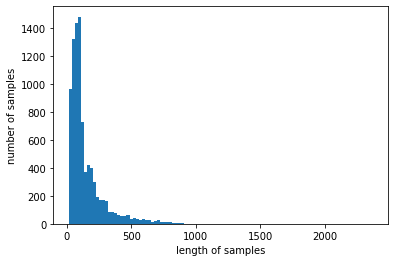

In [ ]:
print('훈련용 뉴스의 최소 길이 :{}'.format(min(len(l) for l in x_train)))
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

길이 분포를 시각화했습니다.

대략 길이가 300개 이하인 데이터 위주로 이루어져있습니다.

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

for i, count in zip(unique_elements, counts_elements):
    print(f"클래스 {i}의 등장 횟수 : {count}")

클래스 0의 등장 횟수 : 55
클래스 1의 등장 횟수 : 432
클래스 2의 등장 횟수 : 74
클래스 3의 등장 횟수 : 3159
클래스 4의 등장 횟수 : 1949
클래스 5의 등장 횟수 : 17
클래스 6의 등장 횟수 : 48
클래스 7의 등장 횟수 : 16
클래스 8의 등장 횟수 : 139
클래스 9의 등장 횟수 : 101
클래스 10의 등장 횟수 : 124
클래스 11의 등장 횟수 : 390
클래스 12의 등장 횟수 : 49
클래스 13의 등장 횟수 : 172
클래스 14의 등장 횟수 : 26
클래스 15의 등장 횟수 : 20
클래스 16의 등장 횟수 : 444
클래스 17의 등장 횟수 : 39
클래스 18의 등장 횟수 : 66
클래스 19의 등장 횟수 : 549
클래스 20의 등장 횟수 : 269
클래스 21의 등장 횟수 : 100
클래스 22의 등장 횟수 : 15
클래스 23의 등장 횟수 : 41
클래스 24의 등장 횟수 : 62
클래스 25의 등장 횟수 : 92
클래스 26의 등장 횟수 : 24
클래스 27의 등장 횟수 : 15
클래스 28의 등장 횟수 : 48
클래스 29의 등장 횟수 : 19
클래스 30의 등장 횟수 : 45
클래스 31의 등장 횟수 : 39
클래스 32의 등장 횟수 : 32
클래스 33의 등장 횟수 : 11
클래스 34의 등장 횟수 : 50
클래스 35의 등장 횟수 : 10
클래스 36의 등장 횟수 : 49
클래스 37의 등장 횟수 : 19
클래스 38의 등장 횟수 : 19
클래스 39의 등장 횟수 : 24
클래스 40의 등장 횟수 : 36
클래스 41의 등장 횟수 : 30
클래스 42의 등장 횟수 : 13
클래스 43의 등장 횟수 : 21
클래스 44의 등장 횟수 : 12
클래스 45의 등장 횟수 : 18


클래스 레이블의 분포도 확인해보죠.

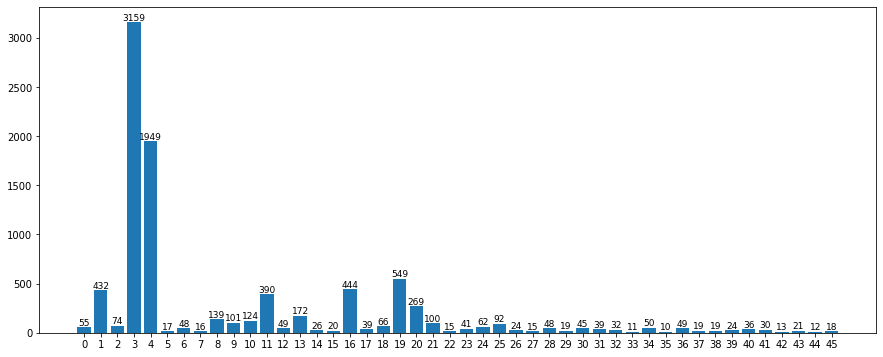

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(unique_elements, counts_elements)
plt.xticks(unique_elements)

for i, value in zip(unique_elements, counts_elements):
    plt.text(i, value, value,
             fontsize=9, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 
plt.show()

보기 편하게 시각화를 하면 이런 모습입니다.

주로 클래스3과 클래스4로 분류되어 있습니다.

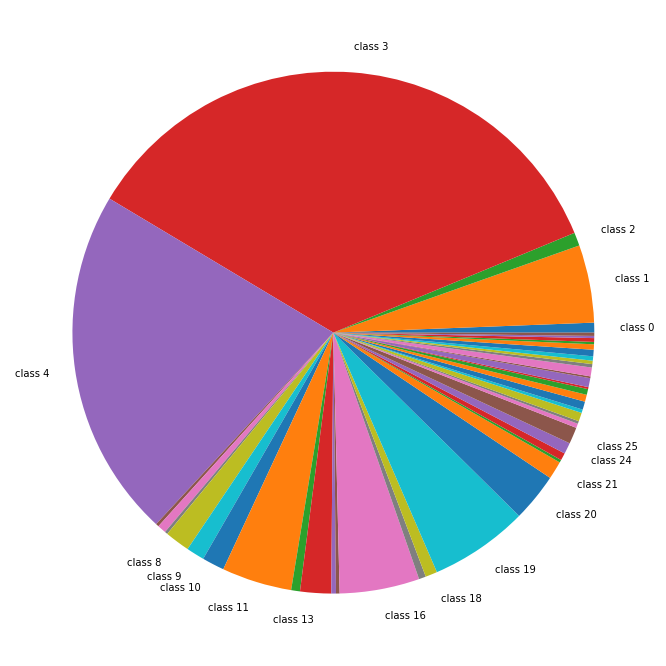

In [ ]:
plt.figure(figsize=(12, 12))
plt.pie(counts_elements, labels=[f"class {i}" if v > 50 else "" for i, v in zip(unique_elements, counts_elements)])
plt.show()

비율 차이를 보기 좋게 시각화하면 이런 모습입니다.

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

sorted(word_index.items(), key=lambda x: x[1])[:30]

[('the', 1),
 ('of', 2),
 ('to', 3),
 ('in', 4),
 ('said', 5),
 ('and', 6),
 ('a', 7),
 ('mln', 8),
 ('3', 9),
 ('for', 10),
 ('vs', 11),
 ('dlrs', 12),
 ('it', 13),
 ('reuter', 14),
 ('000', 15),
 ('1', 16),
 ('pct', 17),
 ('on', 18),
 ('from', 19),
 ('is', 20),
 ('that', 21),
 ('its', 22),
 ('cts', 23),
 ('by', 24),
 ('at', 25),
 ('year', 26),
 ('be', 27),
 ('with', 28),
 ('2', 29),
 ('will', 30)]

데이터를 불러왔던 `reuters`에서 미리 준비된 단어 사전도 가져올 수 있습니다.

In [ ]:
index_to_word = {index+3 : word for word, index in word_index.items()}

sorted(index_to_word.items())[:30]

[(4, 'the'),
 (5, 'of'),
 (6, 'to'),
 (7, 'in'),
 (8, 'said'),
 (9, 'and'),
 (10, 'a'),
 (11, 'mln'),
 (12, '3'),
 (13, 'for'),
 (14, 'vs'),
 (15, 'dlrs'),
 (16, 'it'),
 (17, 'reuter'),
 (18, '000'),
 (19, '1'),
 (20, 'pct'),
 (21, 'on'),
 (22, 'from'),
 (23, 'is'),
 (24, 'that'),
 (25, 'its'),
 (26, 'cts'),
 (27, 'by'),
 (28, 'at'),
 (29, 'year'),
 (30, 'be'),
 (31, 'with'),
 (32, '2'),
 (33, 'will')]

하지만 실제로 텐서화된 데이터는 단어 사전에서 각각 +3의 값을 가지고 있습니다.

그 이유는 앞에서 4개의 자리는 자연어처리용 토큰이 자리잡고 있기 때문이죠.

그러므로 저희가 사용할 단어 사전은 인덱스에 +3을 해서 만들어줍시다.

In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

그리고 패딩과, 시작 토큰, unknown 토큰을 사전에 넣어줍니다.

이렇게 되면 `0 : <pad>, 1 : <sos>, 2 : <unk>` 토큰이 되는데

첫 번째 단어인 `the`는 4부터 시작하니까 3이 비는데요. 저는 이게 종료 토큰의 자리가 아닐까 싶습니다.

In [ ]:
print(' '.join([index_to_word[index] if index in index_to_word else "<unk>" for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


만든 단어 사전을 이용해 데이터를 역으로 디코딩을 하면 위와 같은 문장이 나옵니다.

In [ ]:
def decoder(array):
    decoded = []
    
    for v in array:
        sentence = ' '.join(index_to_word[i] if i in index_to_word else "<unk>" for i in v)
        decoded.append(sentence)
    
    return decoded

x_train = decoder(x_train)
x_test = decoder(x_test)

디코더 함수를 만들어서 데이터셋을 전부 문장화 해줍니다.

In [ ]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

`num_words`를 10000으로 데이터를 불러왔기 때문에 일부 단어가 `<unk>`으로 처리된 것을 볼 수 있습니다.

- - -
### 머신러닝을 이용한 분류

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score #정확도 계산

불러올 패키지가 많아 한 번에 불러와줍시다.

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

print(x_train_dtm.shape)

(8982, 9670)


먼저 데이터를 DTM 단어 벡터로 변환합니다.

총 9670개의 단어에 대한 벡터로 변환됐습니다.

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

print(tfidfv.shape)

(8982, 9670)


그리고 이어서 TF-IDF 행렬로 만들어줍니다.

In [ ]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 9670)


테스트 데이터도 동일하게 TF-IDF 행렬까지 만들어주지만 fit은 하지 않고,

훈련용 데이터로 fit한 모델을 가져와 적용만 해줍니다.

In [ ]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [ ]:
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


첫 번째 머신러닝 모델로 나이브 베이즈 분류기를 가져와 테스트해보겠습니다.

In [ ]:
print("4번 째 테스트 데이터의 문장 :", x_test[3])
print("4번 째 테스트 데이터의 레이블 :", y_test[3])

4번 째 테스트 데이터의 문장 : <sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
4번 째 테스트 데이터의 레이블 : 4


4번 째 데이터의 레이블은 4입니다.

In [ ]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

probability_3.argmax()

4

머신러닝 모델도 4라고 예측하고 있군요.

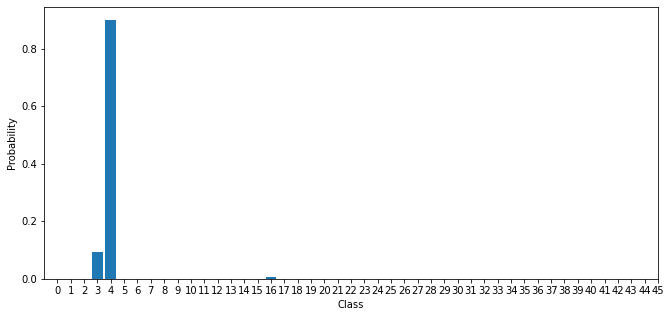

In [ ]:
plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

딥러닝의 `softmax`처럼 각 클래스로 얼마나 예측을 신뢰하고 있는지도 확인할 수 있습니다.

In [ ]:
model.predict(tfidfv_test[3])

array([4])

문장을 주면서 새로 예측을 하라고 해도 정답 레이블인 4가 나옵니다.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

클래스별로 봤을 때 평균 `f1-score`는 10%, 전체로 봤을 때는 평균 58%가 나왔습니다.

아무리 클래스가 많다지만 썩 정확하게 예측하진 못했네요.

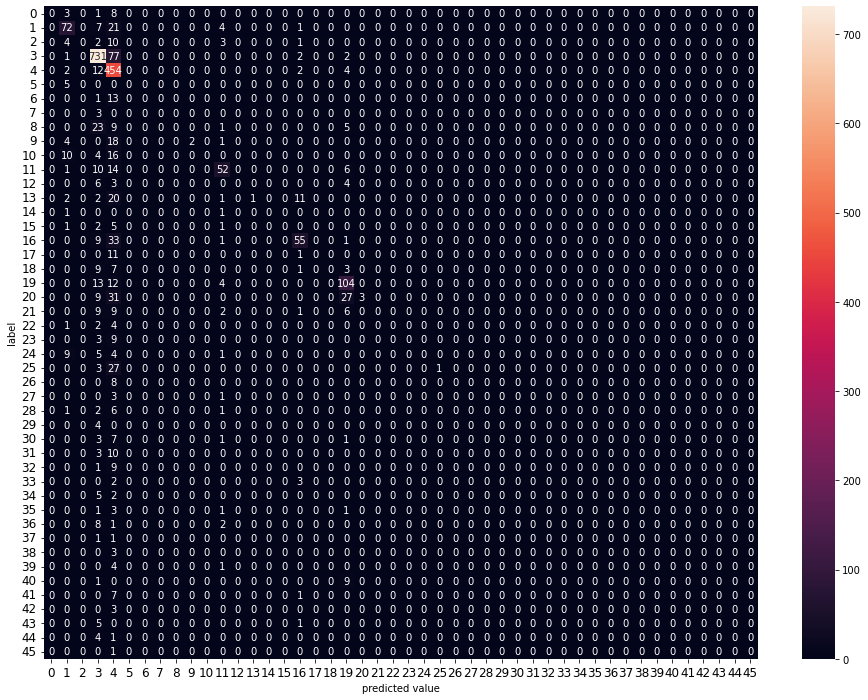

In [ ]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(16, 12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

graph_confusion_matrix(model, tfidfv_test, y_test)

레이블과 예측값의 히트맵을 보면 이렇습니다.

좌상단에서 우하단으로 뻗어나가는 대각선만 보면 되고, 나머지 위치에 있는 값들은 예측이 빗나간 수라고 보시면 되겠습니다.

    O X X X X
    X O X X X
    X X O X X
    X X X O X
    X X X X O

In [ ]:
import time

classifier_models = {
    'mb' : MultinomialNB(),
    'cb' : ComplementNB(),
    'lr' : LogisticRegression(C=10000, penalty='l2', max_iter=3000),
    'lsvc' : LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False),
    'tree' : DecisionTreeClassifier(max_depth=10, random_state=0),
    'forest' : RandomForestClassifier(n_estimators=5, random_state=0),
    'grbt' : GradientBoostingClassifier(random_state=0), # verbose=3
    'voting' : VotingClassifier(estimators=[
             ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
            ('cb', ComplementNB()),
            ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft')
}

def learning_models(x_train, y_train, x_test, y_test, models):
    timestart = time.time()
    results = {}
    
    for k, v in models.items():
        fitstart = time.time()
        print(f">> {k} is learning...")
        v.fit(x_train, y_train)
        fittime = time.time() - fitstart
        print(f">> {k} has finished learning. {int(fittime)}s")
        y_pred = v.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1_score = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['f1-score']
        results[k] = [accuracy, f1_score]
    
    timelaps = time.time() - timestart
    print("\nAll models have been trained!")
    print('Time for training : {}h {}m {}s'.format(int(timelaps//3600), int(timelaps%3600//60), int(timelaps%60)))
    results = pd.DataFrame(data=results, index=['accuracy', 'f1-score']).T
    
    return results, models

results, models = learning_models(tfidfv, y_train, tfidfv_test, y_test, classifier_models)

>> mb is learning...
>> mb has finished learning. 0s
>> cb is learning...
>> cb has finished learning. 0s
>> lr is learning...
>> lr has finished learning. 626s
>> lsvc is learning...


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>> lsvc has finished learning. 102s
>> tree is learning...
>> tree has finished learning. 1s
>> forest is learning...
>> forest has finished learning. 1s
>> grbt is learning...
>> grbt has finished learning. 853s
>> voting is learning...
>> voting has finished learning. 1427s

All models have been trained!
Time for training : 0h 50m 14s


총 8개의 머신러닝 모델을 가져와 순차적으로 모두 학습 후 예측까지 진행하는 함수를 만들어봤습니다.

`LogisticRegression`과 `GradientBoostingClassifier`가 상당히 오래 걸리네요.

오래 걸리던 두 모델을 모두 포함시킨 `voting`은 20분이 넘게 소요됐습니다.

In [ ]:
results

,accuracy,f1-score
mb,0.656723,0.576447
cb,0.770703,0.745668
lr,0.810775,0.805680
lsvc,0.787177,0.782709
tree,0.620214,0.577640
forest,0.674087,0.642948
grbt,0.766251,0.762225
voting,0.816563,0.813372


결과를 보시면 학습이 오래 걸렸던 모델 위주로 결과가 좋게 나온 모습을 볼 수 있고,

모델 앙상블 기법을 이용한 `voting`이 역시 가장 높은 `f1-score`를 달성했습니다.

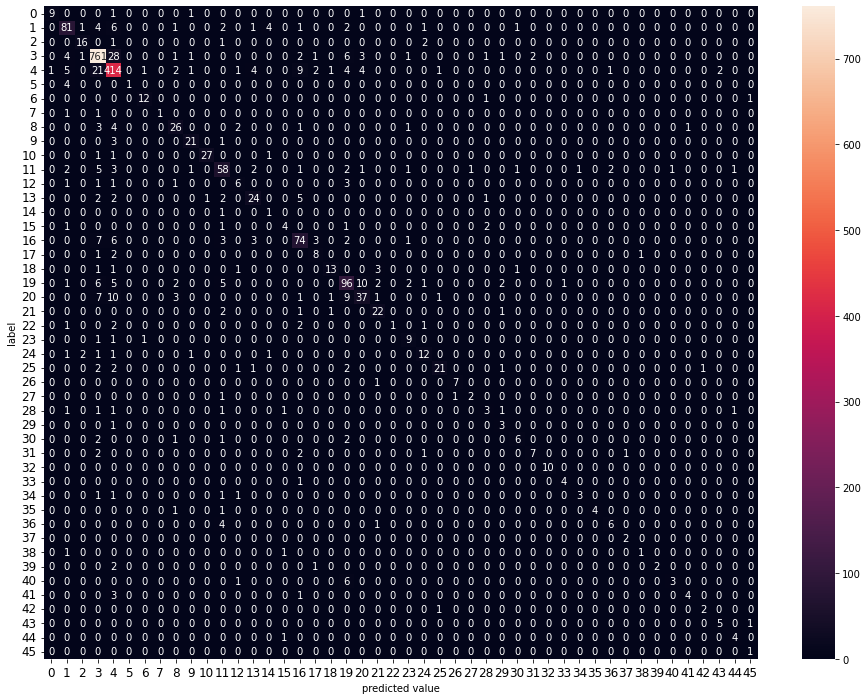

In [ ]:
graph_confusion_matrix(models['voting'], tfidfv_test, y_test)

`voting`의 히트맵을 봐도 상당히 많은 수의 레이블을 예측에 성공했습니다.

#### *num_words : None*

지금까지 TF-IDF의 단어 벡터로 변환했을 때 머신러닝의 클래스 예측 성능을 확인했는데요.

만약 단어가 많게 혹은 적게 나온다면 어떻게 될까요?

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

첫 번째 실험에선 1만 개의 단어를 가지고 벡터를 만들었지만,

두 번째로는 모든 단어를 가져와 실험해보겠습니다.

In [ ]:
x_train = decoder(x_train)
x_test = decoder(x_test)

x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

알 수 없는 단어는 없기 때문에 `<unk>`처리된 단어가 사라졌습니다.

In [ ]:
#dtmvector = CountVectorizer()
#tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

print(tfidfv.shape)
print(tfidfv_test.shape)

(8982, 26506)
(2246, 26506)


9670개였던 단어 벡터가 26506개의 단어로 늘어났습니다.

In [ ]:
results, models = learning_models(tfidfv, y_train, tfidfv_test, y_test, classifier_models)

results

>> mb is learning...
>> mb has finished learning. 0s
>> cb is learning...
>> cb has finished learning. 0s
>> lr is learning...
>> lr has finished learning. 816s
>> lsvc is learning...


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>> lsvc has finished learning. 94s
>> tree is learning...
>> tree has finished learning. 1s
>> forest is learning...
>> forest has finished learning. 2s
>> grbt is learning...
>> grbt has finished learning. 909s
>> voting is learning...
>> voting has finished learning. 1745s

All models have been trained!
Time for training : 0h 59m 31s


,accuracy,f1-score
mb,0.599733,0.504567
cb,0.764915,0.734653
lr,0.816563,0.811443
lsvc,0.796082,0.792019
tree,0.621104,0.576928
forest,0.654497,0.622591
grbt,0.770258,0.764167
voting,0.815672,0.811756


벡터의 크기가 늘어난 만큼 훈련 속도가 조금 증가했지만 

81.33%였던 이전 `voting`의 `f1-score`를 고려하면 성능 향상은 미미하거나 오히려 더 떨어졌다고 볼 수 있군요.

일부 모델은 성능이 크게 떨어지기도 했습니다.

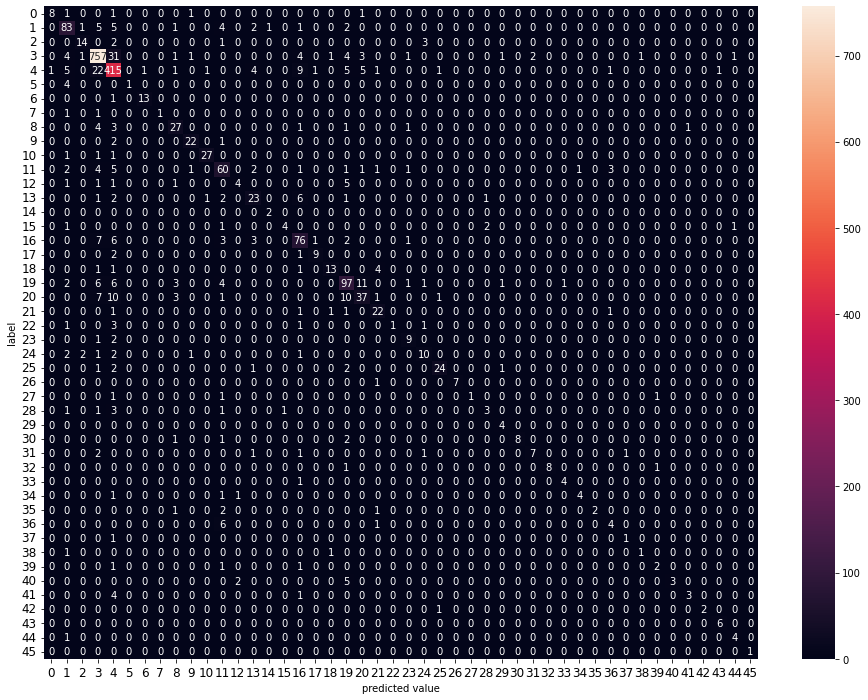

In [ ]:
graph_confusion_matrix(models['lr'], tfidfv_test, y_test)

큰 차이는 없겠지만 그래도 성능이 조금은 올라간 유망주 모델 `LogisticRegression`의 히트맵을 살펴봤습니다.

#### *num_words : 5000*

그럼 다음은 단어 수를 5000개로 제한했을 때의 성능을 확인해보겠습니다.

In [ ]:
word_index = {word : index for index, word in index_to_word.items()}

def encoder(array):
    encoded = []
    
    for v in array:
        tensor = [word_index[word] if word in word_index else word_index['<unk>'] for word in v.split()]
        encoded.append(tensor)
    
    return np.array(encoded, dtype=object)

x_train_tensor = encoder(x_train)
x_test_tensor = encoder(x_test)

x_train_tensor[:3]

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

그냥 `num_words`를 5000으로 두고 데이터를 불러오면 되지만 수동적인 절차를 한 번 시도해보겠습니다.

그러기 위해서 먼저 문장화된 데이터를 다시 정수로 바꿔줬습니다.

In [ ]:
x_train_num5000 = np.array([[i if i < 5000 else word_index['<unk>'] for i in tensor] for tensor in x_train_tensor], dtype=object)
x_test_num5000 = np.array([[i if i < 5000 else word_index['<unk>'] for i in tensor] for tensor in x_test_tensor], dtype=object)

x_train_num5000[:3]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59

그리고 정수의 값 중에서 5000 이상의 값은 모두 `word_index['<unk>']`로 바꿔줍니다.

그러면 `num_words`를 대략 4996으로 불러온 것과 같은 데이터로 바뀌게 되겠죠.

    -3은 미리 준비된 토큰값, -1은 5000이하가 아닌 5000미만을 조건으로 뒀기 때문에

In [ ]:
x_train_num5000 = decoder(x_train_num5000)
x_test_num5000 = decoder(x_test_num5000)

x_train_num5000[:3]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

마지막으로 단어 행렬 벡터로 만들기 위해 단어 상태로 디코딩해줍니다.

In [ ]:
#dtmvector = CountVectorizer()
#tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train_num5000)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test_num5000) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

print(tfidfv.shape)
print(tfidfv_test.shape)

(8982, 4867)
(2246, 4867)


모든 단어를 사용했을 때보다 훨씬 적은 4867개의 단어 벡터로 변환됐습니다.

In [ ]:
results, models = learning_models(tfidfv, y_train, tfidfv_test, y_test, classifier_models)

results

>> mb is learning...
>> mb has finished learning. 0s
>> cb is learning...
>> cb has finished learning. 0s
>> lr is learning...
>> lr has finished learning. 425s
>> lsvc is learning...


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>> lsvc has finished learning. 108s
>> tree is learning...
>> tree has finished learning. 1s
>> forest is learning...
>> forest has finished learning. 1s
>> grbt is learning...
>> grbt has finished learning. 804s
>> voting is learning...
>> voting has finished learning. 1225s

All models have been trained!
Time for training : 0h 42m 46s


,accuracy,f1-score
mb,0.673197,0.601250
cb,0.770703,0.745899
lr,0.803651,0.798560
lsvc,0.774265,0.770013
tree,0.617988,0.572997
forest,0.701247,0.677022
grbt,0.767587,0.766248
voting,0.810329,0.807593


훈련도 첫 번째 실험보다 조금 더 빨라졌지만 성능은 역시 더 떨어졌습니다.

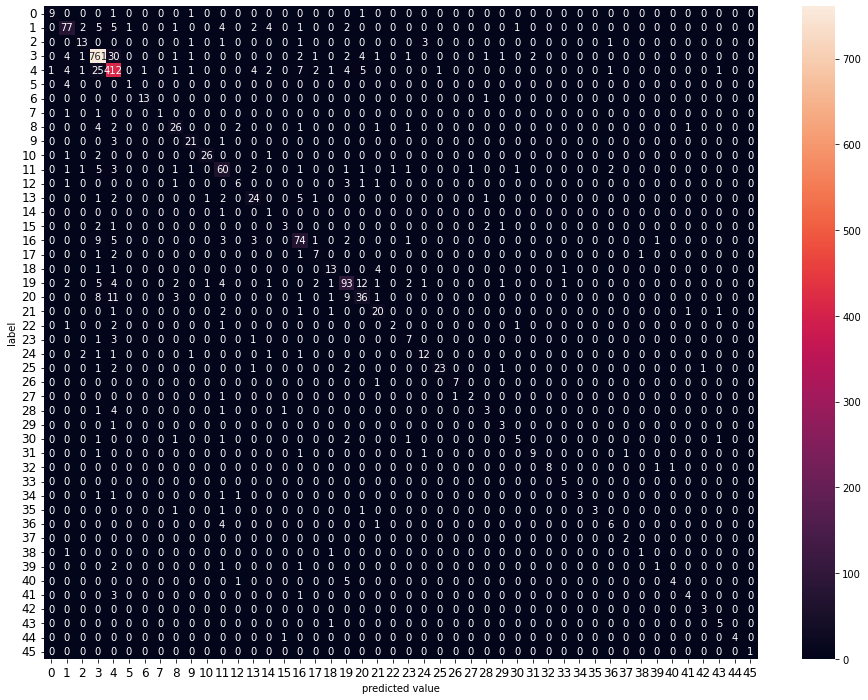

In [ ]:
graph_confusion_matrix(models['voting'], tfidfv_test, y_test)

하지만 히트맵을 보면 그래도 이번엔 골고루 틀렸다는 느낌은 드네요.

레이블이 골고루 틀렸다 = 가중치가 정규화되었다 = 모델의 복잡도가 증가되었다는 뜻입니다.

#### *num_words : 50 to 5000*

마지막으로 새로운 시도를 해보겠습니다.

뒤에선 5000개, 앞에선 50개의 단어를 잘라서 너무 자주 나오는 단어까지 제외해주는겁니다.

In [ ]:
x_train_num50_5000 = np.array([[i if 50 < i < 5000 else word_index['<unk>'] for i in tensor] for tensor in x_train_tensor], dtype=object)
x_test_num50_5000 = np.array([[i if 50 < i < 5000 else word_index['<unk>'] for i in tensor] for tensor in x_test_tensor], dtype=object)

x_train_num50_5000[:3]

array([list([2, 2, 2, 2, 2, 2, 447, 2, 2, 207, 270, 2, 3095, 111, 2, 369, 186, 90, 67, 2, 89, 2, 2, 102, 2, 2, 124, 2, 90, 67, 84, 2, 482, 2, 2, 2, 2, 2, 2, 864, 2, 209, 154, 2, 151, 2, 83, 2, 2, 2, 155, 2, 2, 2, 2, 2, 4579, 1005, 504, 2, 258, 2, 272, 2, 2, 2, 134, 2, 2, 2, 2, 2, 197, 1245, 90, 67, 52, 2, 209, 2, 2, 132, 2, 109, 2, 2, 2]),
       list([2, 3267, 699, 3434, 2295, 56, 2, 2, 2, 56, 3906, 1073, 81, 2, 1198, 57, 366, 737, 132, 2, 4093, 2, 2, 2, 2295, 2, 1037, 3267, 699, 3434, 2, 2, 2, 241, 2, 855, 129, 231, 783, 2, 2, 587, 2295, 2, 2, 775, 2, 2, 2, 191, 2, 2, 1795, 505, 2, 2]),
       list([2, 53, 2, 284, 2, 2, 272, 2, 53, 959, 2, 818, 2, 2, 272, 2, 2, 684, 70, 2, 2, 2, 3886, 2, 180, 183, 187, 70, 2, 2, 102, 2, 2, 2, 53, 2, 704, 2, 2, 2, 758, 2, 53, 959, 2, 1013, 2, 2, 2, 132, 2, 2, 965, 2, 2, 2, 147, 72, 2, 180, 183, 187, 2, 2, 2, 102, 2, 2, 123, 186, 90, 67, 960, 2, 78, 2, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617, 80, 1274, 2, 905, 220, 2, 2, 346, 2, 235,

거의 대부분이 2(`word_index['<unk>']`)의 값을 가지고 있습니다.

In [ ]:
x_train_num50_5000 = decoder(x_train_num50_5000)
x_test_num50_5000 = decoder(x_test_num50_5000)

x_train_num50_5000[:3]

['<unk> <unk> <unk> <unk> <unk> <unk> result <unk> <unk> december acquisition <unk> space co <unk> expects earnings per share <unk> 1987 <unk> <unk> 15 <unk> <unk> 30 <unk> per share up <unk> 70 <unk> <unk> <unk> <unk> <unk> <unk> pretax <unk> should rise <unk> nine <unk> 10 <unk> <unk> <unk> six <unk> <unk> <unk> <unk> <unk> rental operation revenues <unk> 19 <unk> 22 <unk> <unk> <unk> 12 <unk> <unk> <unk> <unk> <unk> cash flow per share this <unk> should <unk> <unk> 50 <unk> three <unk> <unk> <unk>',
 '<unk> generale de banque sa lt <unk> <unk> <unk> lt heller overseas corp <unk> chicago have each taken 50 <unk> stakes <unk> <unk> <unk> sa <unk> factors generale de banque <unk> <unk> <unk> statement <unk> gave no financial details <unk> <unk> transaction sa <unk> <unk> turnover <unk> <unk> <unk> 17 <unk> <unk> belgian francs <unk> <unk>',
 '<unk> shr <unk> 28 <unk> <unk> 22 <unk> shr diluted <unk> 99 <unk> <unk> 22 <unk> <unk> 46 0 <unk> <unk> <unk> 328 <unk> avg shrs 14 0 <unk> <unk

문장 형태로 봐도 살짝 알아보기 힘든데 모델 학습 결과는 어떻게 될까요?

In [ ]:
#dtmvector = CountVectorizer()
#tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train_num50_5000)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test_num50_5000) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

print(tfidfv.shape)
print(tfidfv_test.shape)

(8982, 4832)
(2246, 4832)


In [ ]:
results, models = learning_models(tfidfv, y_train, tfidfv_test, y_test, classifier_models)

results

>> mb is learning...
>> mb has finished learning. 0s
>> cb is learning...
>> cb has finished learning. 0s
>> lr is learning...
>> lr has finished learning. 470s
>> lsvc is learning...


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


>> lsvc has finished learning. 73s
>> tree is learning...
>> tree has finished learning. 0s
>> forest is learning...
>> forest has finished learning. 1s
>> grbt is learning...
>> grbt has finished learning. 592s
>> voting is learning...
>> voting has finished learning. 1084s

All models have been trained!
Time for training : 0h 37m 2s


,accuracy,f1-score
mb,0.646928,0.558450
cb,0.777382,0.753335
lr,0.806322,0.799989
lsvc,0.774711,0.771686
tree,0.617542,0.567219
forest,0.705699,0.680971
grbt,0.769813,0.766428
voting,0.811665,0.807555


그렇습니다.

뻘짓이였습니다.

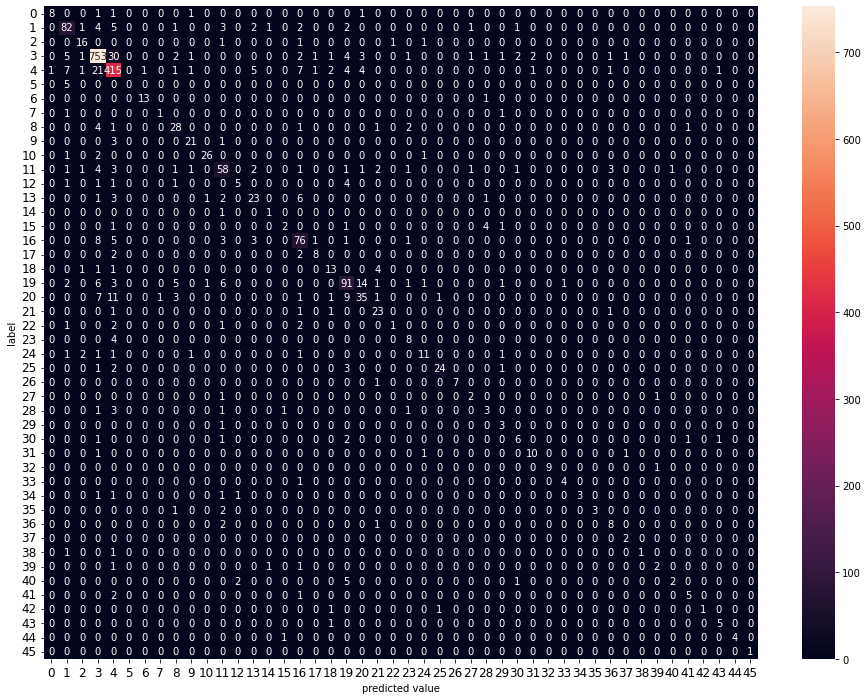

In [ ]:
graph_confusion_matrix(models['voting'], tfidfv_test, y_test)

히트맵도 ~5000 모델보다 덜하네요.

- - -
### 딥러닝을 이용한 분류

제가 직접 설계하는 딥러닝 모델로 머신러닝 모델과 비교해보고 마무리짓겠습니다.

In [ ]:
import tensorflow as tf

X_train = tf.keras.preprocessing.sequence.pad_sequences(x_train_tensor, padding='post')#, maxlen=400)
X_test = tf.keras.preprocessing.sequence.pad_sequences(x_test_tensor, padding='post')#, maxlen=400)

print(X_train.shape)
print(X_test.shape)

(8982, 2376)
(2246, 1032)


전처리는 일절 없습니다. 패딩으로 크기만 맞춰줍니다.

In [ ]:
from tensorflow.keras import layers, Model
import tensorflow as tf

tf.random.set_seed(1337)

class DeepModel(Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        self.emb = layers.Embedding(vocab_size, embedding_size)
        self.lstm1 = layers.Bidirectional(layers.LSTM(hidden_size, return_sequences=True, dropout=0.4))
        self.lstm2 = layers.Bidirectional(layers.LSTM(hidden_size, dropout=0.4))
        self.batch = layers.BatchNormalization()
        self.flatten = layers.Flatten()
        self.outputs = layers.Dense(46, activation='softmax')
        
    def call(self, x):
        x = self.emb(x)
        x = self.lstm1(x)
        x = self.lstm2(x)
        x = self.batch(x)
        x = self.flatten(x)
        x = self.outputs(x)
        
        return x

vocab_size = 10000
embedding_size = 128
hidden_size = 64

model = DeepModel(vocab_size, embedding_size, hidden_size)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=15)

Epoch 1/15
57/57 [==============================] - 51s 448ms/step - loss: 2.1811 - accuracy: 0.5233 - val_loss: 2.8179 - val_accuracy: 0.5888
Epoch 2/15
57/57 [==============================] - 25s 434ms/step - loss: 1.3515 - accuracy: 0.6793 - val_loss: 2.5201 - val_accuracy: 0.6923
Epoch 3/15
57/57 [==============================] - 25s 439ms/step - loss: 0.9675 - accuracy: 0.7761 - val_loss: 2.0892 - val_accuracy: 0.7318
Epoch 4/15
57/57 [==============================] - 25s 444ms/step - loss: 0.7011 - accuracy: 0.8365 - val_loss: 1.7843 - val_accuracy: 0.7346
Epoch 5/15
57/57 [==============================] - 26s 450ms/step - loss: 0.5206 - accuracy: 0.8768 - val_loss: 1.2276 - val_accuracy: 0.7646
Epoch 6/15
57/57 [==============================] - 26s 455ms/step - loss: 0.3921 - accuracy: 0.9122 - val_loss: 1.1033 - val_accuracy: 0.7696
Epoch 7/15
57/57 [==============================] - 26s 461ms/step - loss: 0.3196 - accuracy: 0.9254 - val_loss: 1.0739 - val_accuracy: 0.7590

임베딩으로 시작해서 두 개의 양방향 LSTM 레이어를 지나고 가중치 값을 정규화한 후 `softmax`로 최종 출력하는 모델입니다.

`vocab_size`는 머신러닝 모델 실험 중 결과가 가장 좋게 나왔던 1만 개로 했습니다.

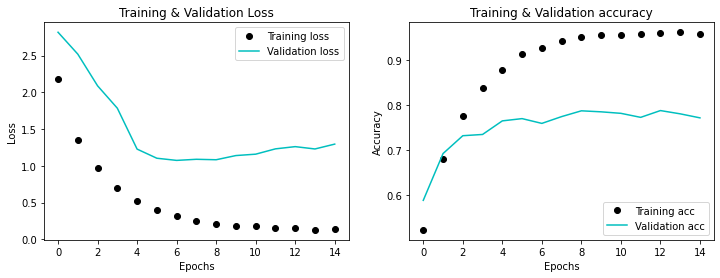

71/71 - 4s - loss: 1.3628 - accuracy: 0.7720
test_loss : 1.3627982139587402 test_acc : 0.7720391750335693


In [ ]:
def print_result(results):
    loss = results[0]
    acc = results[1]
    print(f'test_loss : {loss} test_acc : {acc}')


def history_graph(history):
    plt.figure(figsize=(12, 4))
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.subplot(1, 2, 1)
    plt.plot(loss, 'ko', label='Training loss')
    plt.plot(val_loss, 'c', label='Validation loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(acc, 'ko', label='Training acc')
    plt.plot(val_acc, 'c', label='Validation acc')
    plt.title('Training & Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


history_graph(history)

results = model.evaluate(X_test, y_test, verbose=2)
print_result(results)

아무리 모델을 튜닝해도 77%, 78% 그 이상은 안올라가네요.

포기하겠습니다.

In [ ]:
predicted = model.predict(X_test)
predicted = [i.argmax() for i in predicted]

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.55      0.75      0.64       105
           2       0.62      0.65      0.63        20
           3       0.91      0.92      0.91       813
           4       0.84      0.86      0.85       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       0.50      0.33      0.40         3
           8       0.62      0.63      0.62        38
           9       0.65      0.80      0.71        25
          10       0.78      0.83      0.81        30
          11       0.64      0.58      0.61        83
          12       0.67      0.46      0.55        13
          13       0.42      0.59      0.49        37
          14       0.00      0.00      0.00         2
          15       0.33      0.11      0.17         9
          16       0.59      0.72      0.65        99
          17       1.00    

많이 맞추지는 못했더라도 많이 못맞추지는 않은 모습이네요.

Text(0.5, 87.0, 'predicted value')

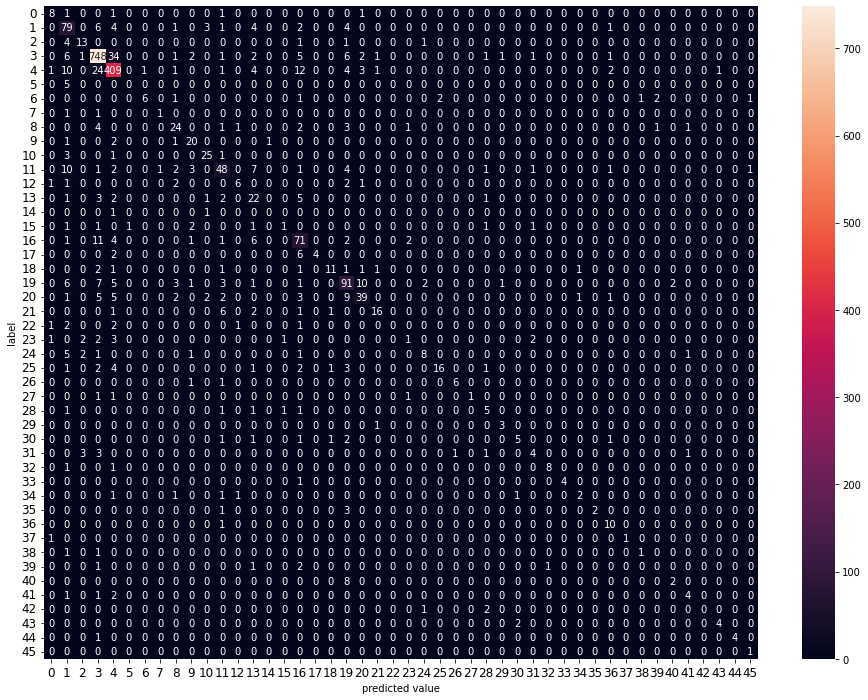

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted))#, index=classes_name, columns=classes_name)
fig = plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)
plt.ylabel('label')
plt.xlabel('predicted value')

히트맵으로 보니 일부 클래스에 대해 예측률이 떨어지는 모습이 보입니다.

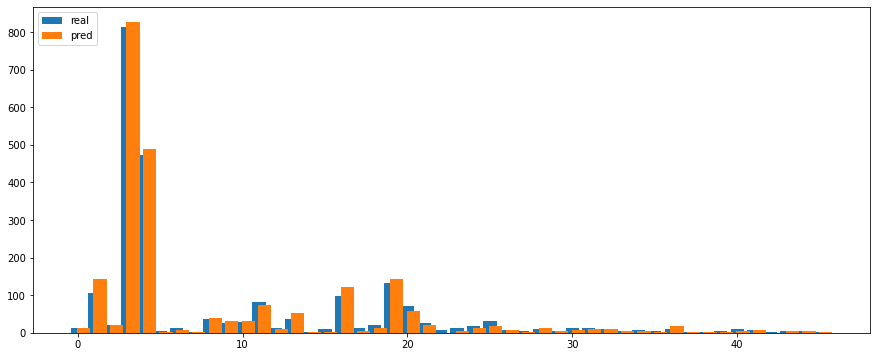

In [ ]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
unique_elements_predict, counts_elements_predict = np.unique(predicted, return_counts=True)

plt.figure(figsize=(15, 6))
plt.bar(unique_elements, counts_elements, label='real')
plt.bar(unique_elements_predict+0.35, counts_elements_predict, label='pred')
plt.legend(loc='upper left')

plt.show()

예측한 레이블과의 분포 차이를 보면 아쉽게 실패한 모델같네요.

- - -
## 마무리하며

가장 높은 스코어를 가진 모델은 `voting`이라고는 하나 실질적으로 가장 좋은 성능을 보여준 모델은 `LogisticRegression`이였습니다.

도대체 무슨 원리길래 문서 단어 벡터를 가지고 예측했을 때 적중률이 높았던걸까요?

로지스틱 회귀의 동작을 간단하게 풀어보자면 단어 벡터의 수 만큼 가중치 벡터가 만들어지고 가중치를 거치면 `softmax`처럼 각 클래스에 대한 확률을 출력하게 되는데요.

이 때 시그모이드 함수(Logistic)를 이용해 다중선형회귀의 범주형 특성 문제를 해결한. 마치 1개의 고도화된 은닉층을 가진 신경망과 비슷합니다.

그렇기 때문에 더 고도화된 신경망을 만들면 머신러닝 모델보단 뛰어날 거라 예상했는데, 쉽지 않았습니다.

머신러닝보다 딥러닝이 꼭 정답은 아니라는 교훈을 얻었네요.

솔직히 머신러닝 모델이 결과가 너무 좋게 나왔을 뿐, 좋은 결과를 기대하기에는 너무 까다로운 데이터와 조건이 아니였나 싶기도 합니다.

딥러닝 모델을 만들기 위한 예시 코드가 없었기 때문에 더욱 힘든 조건이기도 했지만 오히려 저만의 딥러닝 모델을 만든다는 느낌에 더 재미있었던 것 같습니다.